___
# Ciência dos Dados - PROJETO 1

## Lucas Leal Vale
___

## Ordem e Permanecia - Realidade na evolucao do ensino

___
## Introdução

Neste projeto foi analisado como o ensino brasileiro evoluiu, ou não, entre os anos de 2011-2015, com o auxilio de suas respectivas PNADs. Com a finalidade de indicar a segregação social, a falta de compromisso do nosso governo para com as nossas crianças,jovens e adultos e a dificuldade ao acesso de uma educação digna entre todos no país.
Para tanto foram analisados os seguintes aspectos:
O ultimo curso concluido por cada um daqueles que responderam a PNAD, logo os principais graficos apresentados representao o ultimo curso concluido pelo indiviuo.

Em respeito às faixas de renda analisadas, procurei dividi-las próximas ao valor do salário mínimo dos respectivos anos por residencia, ou seja, salários de quinhentos e quarenta reais em 2011 e setecentos e quarenta e oito reais em 2015 por pessoa na moradia.
Com essa pesquisa pretendo responder a pergunta:Como se comportou o ensino no brasil entre 2011 e 2015 de acordo com a renda e entre as cinco regioes brasileiras.


___
## Filtros da base de dados

In [1]:
# Importando bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Lucas\Downloads\Insper


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
#dados11=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
# Renomeando as variáveis
df=pd.DataFrame({'Teve algum trabalho no período de referência de 365 dias':dados.V0701,'Frequenta escola ou creche':dados.V0602,'ultimo nivel escolar':dados.V6007,'UF':dados.UF})#,'Trabalho Rural':dados.V0702,'Trabalho em construcacao':dados.V0703,"trabalhu essa semana":dados.V0704})

# Filtrando o DataFrame
df=df.dropna()

dados.V0701=dados.V0701.astype('category')
dados.V0602=dados.V0602.astype('category')

dados.V0701.cat.categories=(['Sim', 'Não'])
dados.V0602.cat.categories=(['Sim', 'Não'])

In [5]:
#Salvando o DataFrame
df.to_csv('variaveis1.csv')
# df11.to_csv('variaveis2.csv')

In [6]:
#Funcao que divide as rendas da pnad entre faixas de salarios minimos para 2015
def faixas2015(df):
    x=df['V4722']
    if x<748: return 1
    elif x<748*2: return 2
    elif x<748*3: return 3
    elif x<748*4: return 4
    elif x<748*5: return 5
    elif x<748*6: return 6
    elif x<748*7: return 7
    elif x<748*8: return 8
    elif x<748*9: return 9
    elif x<748*10: return 10
    return 11
faixas=dados.apply(faixas2015,axis=1)
dados['faixas']=faixas
dados.faixas=dados.faixas.astype('category')
dados.faixas.cat.categories=(['01','02','03','04','05','06','07','08','09','10','+1'])


In [7]:
dados.V6007=dados.V6007.astype('category')
dados.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])


In [8]:
# h=pd.crosstab(dados.faixas,dados.V6007)
# h

Regular do ensino médio ou do 2º grau                                            78221
Regular do ensino fundamental ou do 1º grau                                      66183
Superior - graduação                                                             34292
Elementar (primário)                                                             29339
Médio 1º ciclo (ginasial, etc.)                                                   5654
Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau           4664
Médio 2º ciclo (científico, clássico, etc.)                                       3381
Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau     2743
Mestrado ou doutorado                                                             1917
Classe de alfabetização - CA                                                      1232
Alfabetização de jovens e adultos                                                  763
Creche                                     

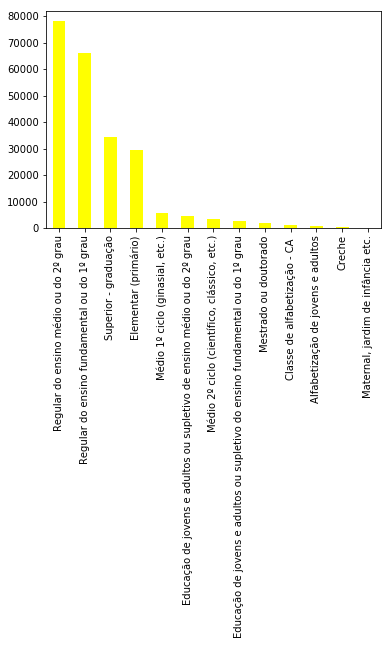

In [9]:

# Value counts realisado para trazer uma nocao sobre quais foram os ultimos cursos concluidos com maior frequencia durante a realizacao da pesquisa da pnad .
bia2=dados.V6007.value_counts()
bia2.plot(kind='bar', color=('yellow', 'salmon', 'blue', 'red', 'green'),  legend=False)
bia2

()

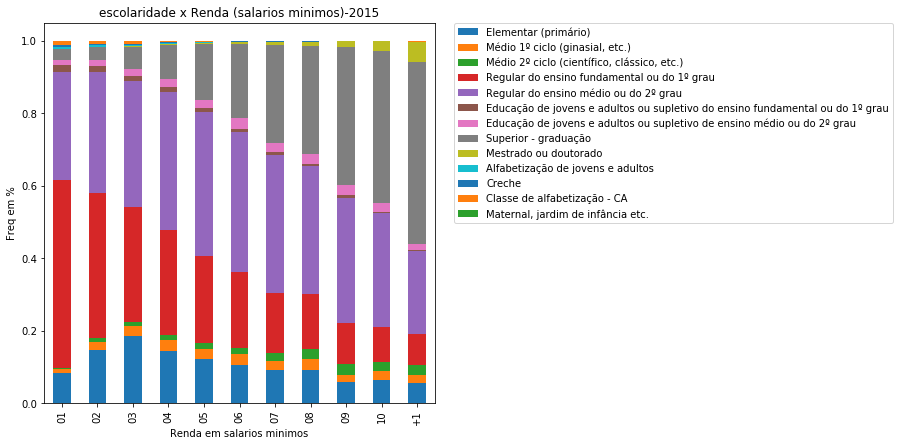

In [10]:
#O proposito do proximo grafico é evidenciar o quanto a renda influencia na escolaridade do brasileiro em 2015
ph=pd.crosstab(dados.faixas,dados.V6007,normalize='index')
a=ph.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x Renda (salarios minimos)-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos')
()

In [11]:
# dados.V6007.describe()

In [81]:
ph

V6007,Elementar (primário),"Médio 1º ciclo (ginasial, etc.)","Médio 2º ciclo (científico, clássico, etc.)",Regular do ensino fundamental ou do 1º grau,Regular do ensino médio ou do 2º grau,Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,Superior - graduação,Mestrado ou doutorado,Alfabetização de jovens e adultos,Creche,Classe de alfabetização - CA,"Maternal, jardim de infância etc."
faixas,,,,,,,,,,,,,
01,0.083363,0.011275,0.002804,0.517934,0.298341,0.019336,0.012677,0.030085,0.000526,0.006309,0.004031,0.011508,0.001811
02,0.146680,0.023087,0.009062,0.401411,0.333832,0.015664,0.016792,0.036680,0.000492,0.004634,0.002788,0.007607,0.001271
03,0.185494,0.026173,0.011211,0.317397,0.349124,0.013615,0.018900,0.061134,0.000953,0.004849,0.002114,0.008248,0.000787
04,0.144099,0.029532,0.014015,0.288981,0.381791,0.012414,0.024664,0.093430,0.001470,0.003103,0.001535,0.004410,0.000555
05,0.120876,0.029462,0.016429,0.237988,0.397595,0.010509,0.024506,0.152356,0.004176,0.001836,0.001377,0.002157,0.000734
06,0.105189,0.029117,0.018871,0.207135,0.386628,0.010615,0.028085,0.204998,0.004497,0.001474,0.001769,0.000958,0.000663
07,0.091711,0.024624,0.022588,0.163839,0.382841,0.007271,0.024721,0.269123,0.009792,0.000582,0.001260,0.001357,0.000291
08,0.091229,0.030645,0.027474,0.150229,0.354174,0.005107,0.027122,0.299753,0.011272,0.000352,0.001233,0.000881,0.000528
09,0.056932,0.020518,0.029020,0.114233,0.345841,0.006839,0.029020,0.379852,0.015527,0.000370,0.001109,0.000555,0.000185


In [12]:
# adicionando uma segunda pnad para uma analise temporal do problema da educacao brasileira
dados2011=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')
df2011=pd.DataFrame({'Teve algum trabalho no período de referência de 365 dias':dados2011.V0701,'Frequenta escola ou creche':dados2011.V0602,'ultimo nivel escolar':dados2011.V6007})#,'Trabalho Rural':dados.V0702,'Trabalho em construcacao':dados.V0703,"trabalhu essa semana":dados.V0704})
df2011=df2011.dropna()
df2011.to_csv('variaveis2011.csv')

In [13]:
# dados.V6007.describe()


In [14]:
# dados2011.V6007.describe()

In [15]:
dados2011.V0701=dados2011.V0701.astype('category')
dados2011.V0602=dados2011.V0602.astype('category')

dados2011.V0701.cat.categories=(['Sim', 'Não'])
dados2011.V0602.cat.categories=(['Sim', 'Não'])
#df2011.head()

In [16]:
#Funcao que divide as rendas da pnad entre faixas de salarios minimos para 2011
def faixas20(df):
    x=df['V4722']
    if x<540: return 1
    elif x<540*2: return 2
    elif x<540*3: return 3
    elif x<540*4: return 4
    elif x<540*5: return 5
    elif x<540*6: return 6
    elif x<540*7: return 7
    elif x<540*8: return 8
    elif x<540*9: return 9
    elif x<540*10: return 10
    return 11

faixas2011=dados2011.apply(faixas20,axis=1)
dados2011['faixas2011']=faixas2011
dados2011.faixas2011=dados2011.faixas2011.astype('category')
dados2011.faixas2011.cat.categories=(['01','02','03','04','05','06','07','08','09','10','+1'])

In [17]:
# renomeando algumas das variaveis
dados2011.V6007=dados2011.V6007.astype('category')
dados2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])


In [82]:
plot2011=pd.crosstab(dados2011.faixas2011,dados2011.V6007,normalize='index')
plot2011

V6007,Elementar (primário),"Médio 1º ciclo (ginasial, etc.)","Médio 2º ciclo (científico, clássico, etc.)",Regular do ensino fundamental ou do 1º grau,Regular do ensino médio ou do 2º grau,Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,Superior - graduação,Mestrado ou doutorado,Alfabetização de jovens e adultos,Creche,Classe de alfabetização - CA,"Maternal, jardim de infância etc."
faixas2011,,,,,,,,,,,,,
01,0.132380,0.019447,0.005084,0.517445,0.249126,0.018494,0.010613,0.020210,0.000254,0.010740,0.004067,0.008643,0.003495
02,0.177915,0.031639,0.010839,0.418344,0.292349,0.014152,0.012823,0.025239,0.000361,0.005814,0.003132,0.005431,0.001961
03,0.211592,0.038269,0.015140,0.324633,0.324772,0.012609,0.015163,0.042704,0.000906,0.005248,0.002554,0.004714,0.001695
04,0.175768,0.037967,0.018480,0.291024,0.362929,0.011637,0.018376,0.072218,0.001389,0.003786,0.002327,0.002953,0.001146
05,0.156507,0.039155,0.023359,0.243660,0.382481,0.011513,0.021913,0.113014,0.001947,0.002392,0.001557,0.001891,0.000612
06,0.130576,0.039014,0.026917,0.210041,0.388099,0.009073,0.024800,0.160668,0.005141,0.001361,0.001890,0.002117,0.000302
07,0.124471,0.044063,0.035225,0.186955,0.384118,0.008588,0.021409,0.186458,0.005726,0.000498,0.001120,0.000747,0.000622
08,0.105124,0.042550,0.040489,0.150913,0.364105,0.007067,0.022821,0.253386,0.010895,0.000589,0.001178,0.000294,0.000589
09,0.101500,0.041262,0.039938,0.129744,0.354369,0.007282,0.023831,0.287511,0.010812,0.001103,0.001324,0.000441,0.000883


()

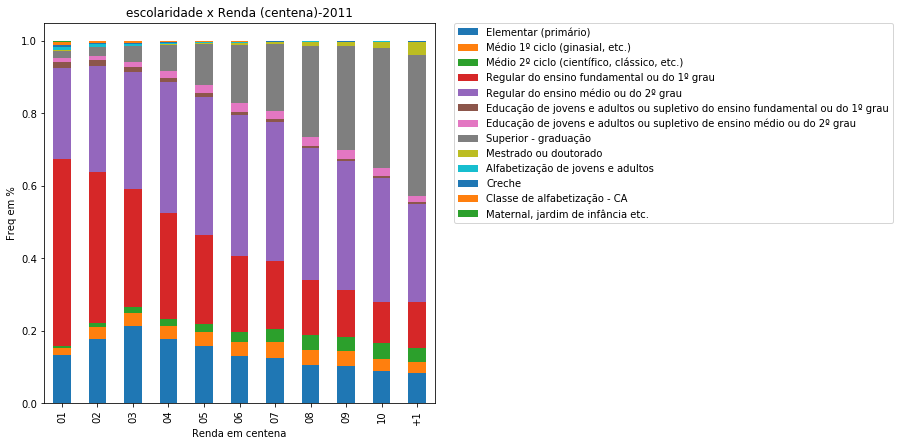

In [18]:
#O proposito do proximo grafico é evidenciar o quanto a renda influencia na escolaridade do brasileiro, igualmente ao anterior porem em 2011

b=plot2011.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2011',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em centena')

()

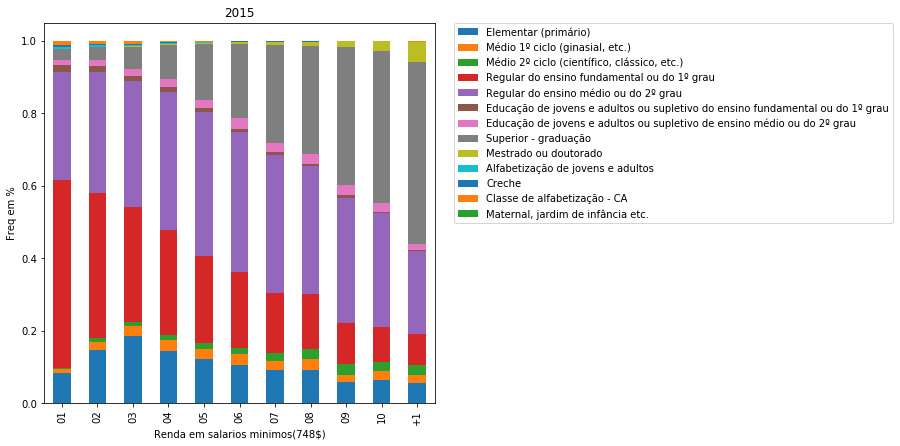

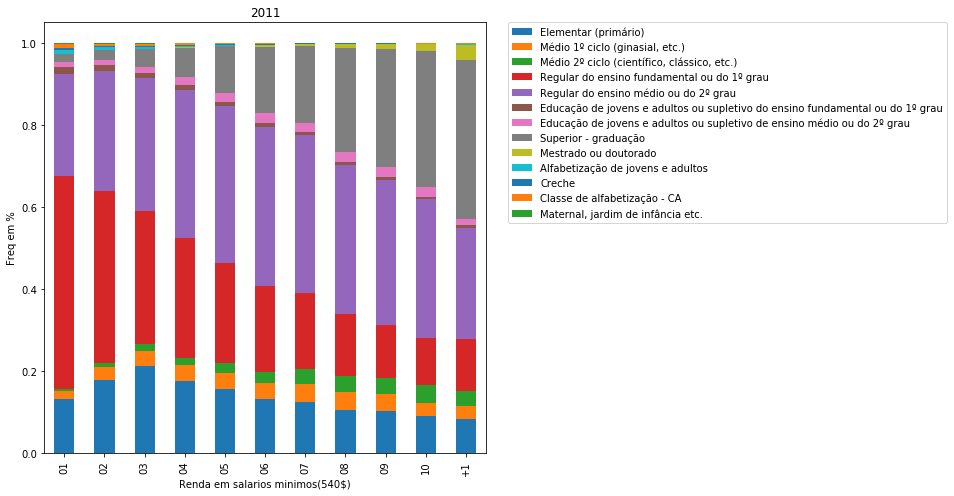

In [19]:
# colocando os dois graficos juntos para melhor comparacao
# Panorama geral do nivel da educacao brasileira
fig=plt.figure(figsize=(7,7))

#plt.subplot(121)
plot=ph.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos(748$)')
plt.title('2015')

#plt.subplot(122)
plot=plot2011.plot(kind='bar',stacked='True',legend=['Sim','Não'],title='escolaridade x Renda (centena)-2011',figsize=(7,7))
plt.title('2011')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('Renda em salarios minimos(540$)')
plt.tight_layout()
plt.show()

In [20]:
# Funcao responsavel por alocar os estados em suas respectivas regioes
def regiao(df):
    x=df['UF']
    if x==11: return 1 #Rondônia
    elif x==12: return 1 #Acre
    elif x==13: return 1 #amazonas
    elif x==14: return 1#roraima
    elif x==15: return 1#para
    elif x==16: return 1#amapa
    elif x==17: return 1#tocantins
    elif x==21: return 2#maranhao
    elif x==22: return 2#piaui
    elif x==23: return 2#ceara
    elif x==24: return 2#rio grande do norte 
    elif x==25: return 2# paraiba
    elif x==13: return 2#pernambuco  
    elif x==27: return 2#alagoas
    elif x==28: return 2#sergipe
    elif x==29: return 2#bahia
    elif x==31: return 3#minas gerais 
    elif x==32: return 3# espirito santo
    elif x==33: return 3# rio de janeiro
    elif x==35: return 3 #sao paulo
    elif x==41: return 4#parana
    elif x==42: return 4#santa catarina
    elif x==43: return 4#rio grande do sul
    elif x==50: return 5#mato grosso do sul
    elif x==51: return 5#mato grosso
    elif x==52: return 5#goias
    elif x==53: return 5#distrito federal
    return 6

In [60]:
# Criando a variavel regioes nos dataframes
regioes=dados.apply(regiao,axis=1)
dados['regioes']=regioes
dados.regioes=dados.regioes.astype('category')
dados.regioes.cat.categories=(['norte','nordeste','sudeste','sul','centro-oeste','outra'])


regioes2011=dados2011.apply(regiao,axis=1)

dados2011['regioes2011']=regioes2011
dados2011.regioes2011=dados2011.regioes2011.astype('category')
dados2011.regioes2011.cat.categories=(['norte','nordeste','sudeste','sul','centro-oeste','outra'])


In [80]:
hello=pd.crosstab(dados['regioes'],dados.V6007,normalize='index')
hello

V6007,Elementar (primário),"Médio 1º ciclo (ginasial, etc.)","Médio 2º ciclo (científico, clássico, etc.)",Regular do ensino fundamental ou do 1º grau,Regular do ensino médio ou do 2º grau,Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,Superior - graduação,Mestrado ou doutorado,Alfabetização de jovens e adultos,Creche,Classe de alfabetização - CA,"Maternal, jardim de infância etc."
regioes,,,,,,,,,,,,,
norte,0.098060,0.014908,0.006751,0.336979,0.373912,0.015793,0.019856,0.121216,0.004430,0.001680,0.001589,0.003605,0.001222
nordeste,0.114709,0.018119,0.011193,0.346239,0.348819,0.014402,0.011477,0.097910,0.004814,0.010116,0.001625,0.019338,0.001239
sudeste,0.134482,0.031439,0.018365,0.249713,0.348559,0.008933,0.020553,0.173525,0.009930,0.001510,0.001717,0.000845,0.000429
sul,0.165950,0.028123,0.015270,0.260835,0.294535,0.011260,0.028867,0.179148,0.010198,0.001328,0.003426,0.000451,0.000611
centro-oeste,0.115023,0.019382,0.014219,0.272239,0.329285,0.012484,0.026069,0.190394,0.014981,0.001016,0.002751,0.001354,0.000804
outra,0.132877,0.035851,0.027385,0.281360,0.351148,0.011263,0.019287,0.127356,0.005889,0.001988,0.000663,0.003828,0.001104


()

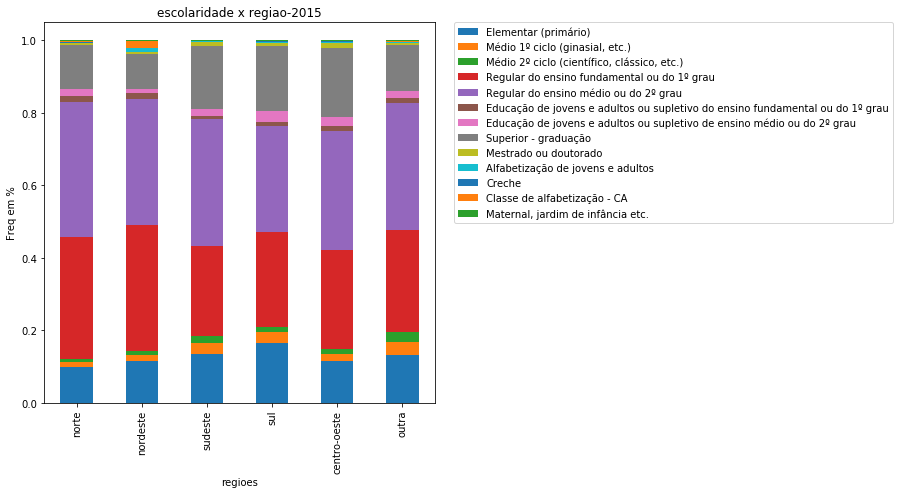

In [61]:
#plotando a diferenca dos niveis de escolaridade entre as diferentes regioes brasileiras em 2015
#hello=pd.crosstab(dados['regioes'],dados.V6007,normalize='index')
c=hello.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x regiao-2015',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('regioes')
()

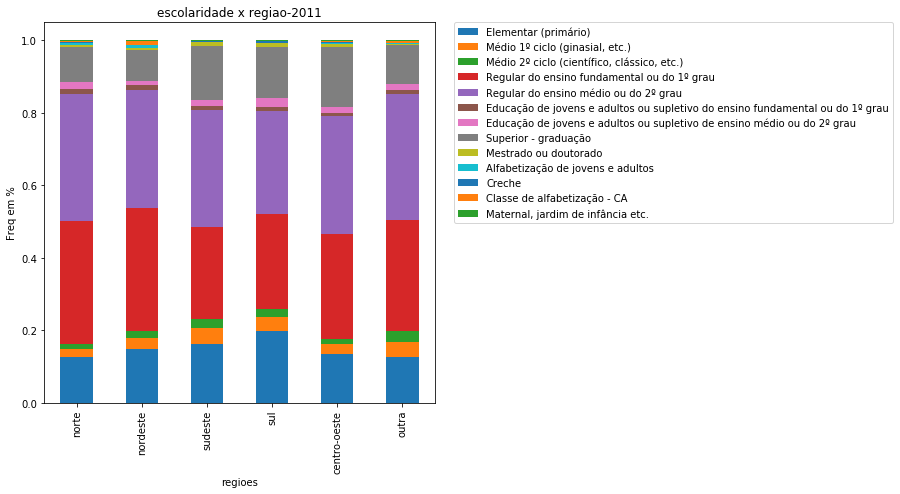

In [66]:
#plotando a diferenca dos niveis de escolaridade entre as diferentes regioes brasileiras em 2011
hello2011=pd.crosstab(dados2011['regioes2011'],dados2011.V6007,normalize='index')
ce=hello2011.plot(kind='bar',stacked='True',legend=['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior - graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.']
,title='escolaridade x regiao-2011',figsize=(7,7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Freq em %')
plt.xlabel('regioes')
plt.show()


In [53]:
### a taxa de pessoas que concluiram o ensino medio entre cada estado ao longo dos anos

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993,faixas,regioes
0,0,2015,11,15,1,1,2,27,2,1992,...,4.0,5,1.0,2.0,2.0,1.0,8.000000e+02,20161117,02,norte
1,1,2015,11,15,3,1,4,4,5,1992,...,4.0,5,1.0,2.0,2.0,1.0,1.150000e+03,20161117,02,norte
2,2,2015,11,15,4,1,4,4,1,1980,...,4.0,6,1.0,2.0,2.0,1.0,7.930000e+02,20161117,07,norte
3,3,2015,11,15,4,2,2,5,6,1981,...,4.0,7,1.0,2.0,2.0,1.0,7.930000e+02,20161117,07,norte
4,4,2015,11,15,4,3,4,8,4,2004,...,4.0,2,2.0,NaN,NaN,2.0,7.930000e+02,20161117,07,norte
5,5,2015,11,15,4,4,4,1,12,2007,...,4.0,2,2.0,NaN,NaN,2.0,7.930000e+02,20161117,07,norte
6,6,2015,11,15,4,5,4,6,12,2010,...,4.0,1,NaN,NaN,NaN,NaN,7.930000e+02,20161117,07,norte
7,7,2015,11,15,4,6,4,8,9,1997,...,4.0,5,1.0,2.0,2.0,1.0,7.930000e+02,20161117,07,norte
8,8,2015,11,15,5,1,2,3,1,1969,...,6.0,2,1.0,2.0,2.0,1.0,2.900000e+03,20161117,08,norte
9,9,2015,11,15,5,2,4,1,1,1934,...,6.0,2,2.0,NaN,NaN,2.0,2.900000e+03,20161117,08,norte


In [75]:
#dadosNordeste=regioes.apply(regiao,axis=1)
dadosnorte=dados[(dados.regioes=='norte')]


dadosnorte['V6007']


0                    Regular do ensino médio ou do 2º grau
1                    Regular do ensino médio ou do 2º grau
2                                                      NaN
3                                     Superior - graduação
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                    Regular do ensino médio ou do 2º grau
8              Regular do ensino fundamental ou do 1º grau
9                                     Elementar (primário)
10             Regular do ensino fundamental ou do 1º grau
11             Regular do ensino fundamental ou do 1º grau
12                   Regular do ensino médio ou do 2º grau
13                   Regular do ensino médio ou do 2º grau
14             Regular do ensino fundamental ou do 1º grau
15                                                     NaN
16                   Regular do ensino médio ou do 2º gr

In [76]:
dadosnorte['V6007'].plot.bar()

TypeError: Empty 'DataFrame': no numeric data to plot

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!

### Portanto com esta pesquisa é possível concluir que a acessibilidade aos niveis escolares mais elevados ainda é um privilegio em 2015 para a elite brasileira sendo o nivel escolar Regular do ensino fundamental ou do 1º grau o ultimo curso finalizado mais comum entre a parte mais pobre da população e a graduação a parte mais presente na elite.
### Para tornar mais quantitativo, em 2015,  com um total de 51,7% está em primeiro lugar entre a faixa mais pobre o nivel escolar Regular do ensino Fundamental e na outra mão a graduação com cerca de 50,2% de seus representantes tendo a graduação concluida e 5.3% com mestrado ou doutorado na elite, enquanto a graduação para a faixa de apenas 1 salário minimo representa apenas 3% desta parcela da população

### Por efeito de comparação em 2011, a faixa de pessoas de baixa renda com apenas o fundamental permaneceu em 51,7% e a faixa de concluintes da Graduação era ligeiramente mais baixa com 2%, e do outro lado a faixa mais rica possuia ''apenas'' 38,75%.
### Tendo esses valores em mente, ficou claro que a maior mudança no cenario educacional brasileiro foi entre os mais ricos que tiveram um aumento consideravel entre aqueles que concluiram o ensino superior. Sendo a principal melhoria para aqueles que recebem até um salário minimo o aumento na taxa de concluintes do ensino medio de 24,9% em 2011 para 29,8% em 2015.

### Para verificar se as regiões influenciariam nas camadas escolares uma outra análise fora feita. Ela revelou que não existe grande diferença entre as faixas de graduação por causa das regiões. 
### Assim revelando que a região não acarreta numa maior inacessibilidade escolar, mas que de fato a renda é o principal fator desses resultados
### Mesmo a análise temporal entre as regiões não foi capaz de revelar grandes mudanças nos niveis de ensino, e sim apenas pequenos detalhes que podem até passar dispercebidos.
### Nas ultimas duas celulas do projeto pretendia realizar um plot de grafico de barras simples, porem um erro muito incomum não possibilitou a comparação mais especifica entre duas regiões, no caso, entre Sudeste e Norte. Para que pudesse expor alguma maior disparidade entre a escolaridade entre ambas regiões.
### O erro incomum diz que meu dataframe nao possui numeric data para plotar um grafico, porem quando realizo um 'print' do dataframe ele aparece por completo.